In [1]:
import numpy as np
import geopandas as gpd
import shapely
import ipyleaflet
import requests
import threadpool
import json
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from IPython.core.interactiveshell import InteractiveShell

matplotlib.style.use('ggplot')

%matplotlib inline
InteractiveShell.ast_node_interactivity = 'all'
API_ENDPOINT = 'https://envirocar.org/api/stable'

ModuleNotFoundError: No module named 'geopandas'

# Data Request

## Track List

In [11]:
# create thread pool to get track list
# for testing, set amount of pages to three
num_track_page = 3
tp_track_list = threadpool.ThreadPool(num_track_page)
track_list = []
def request_track_list(num_page):
    url_track_list = API_ENDPOINT + '/tracks'
    params = {'limit': 100, 'page': num_page}
    response = requests.request('GET', url_track_list, params=params)
    for i in json.loads(response.text)['tracks']:
        track_list.append(i['id'])
tasks = threadpool.makeRequests(request_track_list, [i + 1 for i in range(num_track_page)])
_ = [tp_track_list.putRequest(task) for task in tasks]
tp_track_list.wait()
len(track_list)

300

## Track Points

In [17]:
# get complete tracks
tp_track = threadpool.ThreadPool(50)
list_df_track = []
def request_track(track_id):
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
    df_tmp['track_id'] = df_tmp.apply(lambda x: track_id, axis=1)
    list_df_track.append(df_tmp)
tasks = threadpool.makeRequests(request_track, track_list)
_ = [tp_track.putRequest(task) for task in tasks]
tp_track.wait()
df_track = pd.concat(list_df_track)
# df_track.set_index('time', inplace=True)
df_track.head()
df_track.columns

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 885, in _clean_opt

  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 885, in _clean_opt

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 885, in _clean_options
    raise ValueError(fallback_reason)
ValueError: the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 885, in _clean_options
    raise ValueError(fallback_reason)
ValueError: the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex)
Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 885, in _clean_options
    raise ValueError(fallback_reason)
ValueError: the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

Traceback (most recent call last):
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\threadpool.py", line 158, in run
    result = request.callable(*request.args, **request.kwds)
  File "<ipython-input-17-d08a71a4b789>", line 5, in request_track
    df_tmp = pd.read_csv(API_ENDPOINT + '/tracks/%s.csv' % track_id, sep=';\s+', engine='c')
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 655, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 405, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\parsers.py", line 759, in __init__
    self.options, self.engine = self._clean_options(options, engine)
  File "C:\Users\Vivek\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\io\p

ValueError: No objects to concatenate

## Sensors

In [15]:
# get sensor info
num_sensor_page = 5
tp_sensor_list = threadpool.ThreadPool(num_sensor_page)
sensor = {
    'engine_displacement': [],
    'model': [],
    'sensor_id': [],
    'fuel_type': [],
    'construction_year': [],
    'manufacturer': []
}
def request_sensor_list(num_page):
    url_sensor_list = API_ENDPOINT + '/sensors'
    params = {'limit': 100, 'page': num_page}
    response = requests.request('GET', url_sensor_list, params=params)
    for i in json.loads(response.text)['sensors']:
        if not i['type'] == 'car':
            continue
        if 'engineDisplacement' in i['properties'].keys():
            sensor['engine_displacement'].append(i['properties']['engineDisplacement'])
        else:
            sensor['engine_displacement'].append(0)
        sensor['model'].append(i['properties']['model'])
        sensor['fuel_type'].append(i['properties']['fuelType'])
        sensor['sensor_id'].append(i['properties']['id'])
        sensor['construction_year'].append(i['properties']['constructionYear'])
        sensor['manufacturer'].append(i['properties']['manufacturer'])
tasks = threadpool.makeRequests(request_sensor_list, [i + 1 for i in range(num_sensor_page)])
_ = [tp_sensor_list.putRequest(task) for task in tasks]
tp_sensor_list.wait()
df_sensor = pd.DataFrame.from_dict(sensor)
df_sensor.set_index('sensor_id', inplace=True)
df_sensor.head()

construction_year  engine_displacement fuel_type  \
sensor_id                                                                    
574c3b24e4b09078f97a3366               2006                 1400    diesel   
574d3b8ae4b09078f97ac333               2015                 1200  gasoline   
574dbe31e4b09078f97b66bc               2015                 1995    diesel   
574dc337e4b09078f97b6e10               2008                 1595  gasoline   
574dc4dae4b09078f97b7073               2008                 1595  gasoline   

                         manufacturer      model  
sensor_id                                         
574c3b24e4b09078f97a3366      Citroen        C3   
574d3b8ae4b09078f97ac333         Seat       Leon  
574dbe31e4b09078f97b66bc          BMW       218d  
574dc337e4b09078f97b6e10           vw  golf plus  
574dc4dae4b09078f97b7073           VW  Golf Plud

# Visualization

## Draw single trajectory on map

In [16]:
def get_trajectory(track_id):
    # get dataframe for points of a single track
    df_single_track = df_track[df_track['track_id'] == track_id].copy()
    df_single_track['geometry'] = df_single_track.apply(lambda x: shapely.geometry.Point(x['longitude'], x['latitude']), axis=1)
    df_single_track = gpd.GeoDataFrame(df_single_track)
    # generate line from point, props come from the first point
    ds_next_point = df_single_track['geometry'].copy()
    ds_next_point = ds_next_point.drop(0)
    ds_next_point = ds_next_point.reset_index()
    df_single_track_line = df_single_track.drop(df_single_track.index[len(df_single_track) - 1])
    df_single_track_line['next_point'] = ds_next_point['geometry']
    df_single_track_line['line'] = df_single_track_line.apply(lambda x: shapely.geometry.LineString([x['geometry'], x['next_point']]), axis=1)
    df_single_track_line = df_single_track_line.set_geometry('line')
    return df_single_track_line
    
df_single_track_line=get_trajectory(track_list[0])
df_single_track_line.head()

NameError: ("name 'shapely' is not defined", 'occurred at index 0')

In [ ]:
# create map use ipyleaflet
bounds = df_single_track_line.total_bounds
m = ipyleaflet.Map(center=((bounds[1] + bounds[3]) / 2, (bounds[0] + bounds[2]) / 2),zoom=12)
map_layer = ipyleaflet.basemap_to_tiles(ipyleaflet.basemaps.OpenStreetMap.BlackAndWhite)
# convert datatframe to json
tmp = gpd.GeoDataFrame(df_single_track_line[['line', 'Speed(km/h)']])
tmp = tmp.set_geometry('line')
json_single_track = json.loads(tmp.to_json())
print(json_single_track)
track_layer = ipyleaflet.GeoJSON(data=json_single_track, style={'color': 'blue', 
                                                                'opacity': 1, 'weight':1.9})
# m.add_layer(map_layer)
m.add_layer(track_layer)
m

## Draw single trajectory in graph

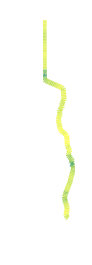

In [94]:
# simplely draw a line in pyplot
# the color of each part of the track decided by speed
_ = df_single_track_line.plot(column='Speed(km/h)', cmap='summer', linewidth=5)
_ = plt.axis('off')

## Draw multi trajectories

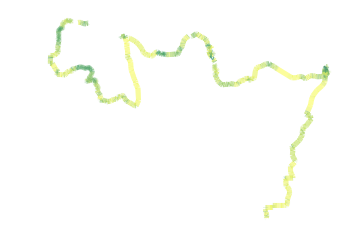

In [109]:
# draw multi tracks on graph, set number to 30 due to time
# There is a problem: Although the trick ids are different, these tracks seem to belong to one trip as shown in 
# plot. I didn't get the access of 'user'(it's listed in the documents) successfully, so I can't
# figure out if these tracks are from the same user(trip).
num_track = 30
list_df_track = [get_trajectory(track_list[i]) for i in range(num_track)]
_, ax = plt.subplots()
ax.set_aspect('equal')
_ = [track.plot(ax=ax, column='Speed(km/h)', cmap='summer', linewidth=5) for track in list_df_track]
_ = plt.axis('off')

# Analysis Based on Tracks

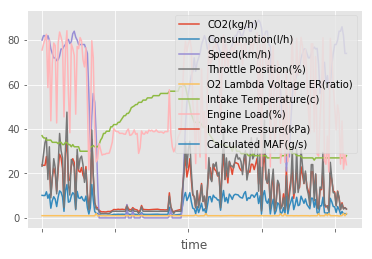

In [104]:
# Due to the deadline and some other reason of my own, I'm sorry to say that I don't have 
# enough time to finish any meaningful analyses, and I just do some easy work.
# In general, I think the analyses can be divided into two categories. One is analysis for 
# trajectory itself, another is analysis for the city through various trajectories.
# I just make an example for the former due to the same reason mentioned above.

# I draw a curve for each sensor measurements to show their change with time and the 
# speed can be a benchmark.
# According to the figure most sensor show a obvious relationship with the speed of the car
df_c = df_single_track_line[['CO2(kg/h)',
                      'Consumption(l/h)', 
                      'Speed(km/h)', 
                      # 'Rpm(u/min)',
                      'Throttle Position(%)', 
                      'O2 Lambda Voltage ER(ratio)', 
                      'Intake Temperature(c)', 
                      'Engine Load(%)', 
                      'Intake Pressure(kPa)', 
                      'Calculated MAF(g/s)']]
_ = df_c.plot()

In [107]:
# then calcaulate the correlation coefficient matrix
# as a result, the consumption and CO2 show the most obvious positive correlation with speed
# while the Intake Temperature has a negetive correlation
coor = df_c.corr()
coor
coor['Speed(km/h)'].sort_values(ascending=False)

CO2(kg/h)  Consumption(l/h)  Speed(km/h)  \
CO2(kg/h)                     1.000000          1.000000     0.685200   
Consumption(l/h)              1.000000          1.000000     0.685200   
Speed(km/h)                   0.685200          0.685200     1.000000   
Throttle Position(%)          0.970603          0.970603     0.640000   
O2 Lambda Voltage ER(ratio)  -0.207949         -0.207949     0.046979   
Intake Temperature(c)        -0.435100         -0.435100    -0.753923   
Engine Load(%)                0.938199          0.938199     0.592491   
Intake Pressure(kPa)               NaN               NaN          NaN   
Calculated MAF(g/s)                NaN               NaN          NaN   

                             Throttle Position(%)  \
CO2(kg/h)                                0.970603   
Consumption(l/h)                         0.970603   
Speed(km/h)                              0.640000   
Throttle Position(%)                     1.000000   
O2 Lambda Voltage ER(ratio)             -0.182423   
Intake Temperature(c)                   -0.398707   
Engine Load(%)                           0.928227   
Intake Pressure(kPa)                          NaN   
Calculated MAF(g/s)                           NaN   

                             O2 Lambda Voltage ER(ratio)  \
CO2(kg/h)                                      -0.207949   
Consumption(l/h)                               -0.207949   
Speed(km/h)                                     0.046979   
Throttle Position(%)                           -0.182423   
O2 Lambda Voltage ER(ratio)                     1.000000   
Intake Temperature(c)                          -0.116955   
Engine Load(%)                                 -0.311646   
Intake Pressure(kPa)                                 NaN   
Calculated MAF(g/s)                                  NaN   

                             Intake Temperature(c)  Engine Load(%)  \
CO2(kg/h)                                -0.435100        0.938199   
Consumption(l/h)                         -0.435100        0.938199   
Speed(km/h)                              -0.753923        0.592491   
Throttle Position(%)                     -0.398707        0.928227   
O2 Lambda Voltage ER(ratio)              -0.116955       -0.311646   
Intake Temperature(c)                     1.000000       -0.343724   
Engine Load(%)                           -0.343724        1.000000   
Intake Pressure(kPa)                           NaN             NaN   
Calculated MAF(g/s)                            NaN             NaN   

                             Intake Pressure(kPa)  Calculated MAF(g/s)  
CO2(kg/h)                                     NaN                  NaN  
Consumption(l/h)                              NaN                  NaN  
Speed(km/h)                                   NaN                  NaN  
Throttle Position(%)                          NaN                  NaN  
O2 Lambda Voltage ER(ratio)                   NaN                  NaN  
Intake Temperature(c)                         NaN                  NaN  
Engine Load(%)                                NaN                  NaN  
Intake Pressure(kPa)                          NaN                  NaN  
Calculated MAF(g/s)                           NaN                  NaN

Speed(km/h)                    1.000000
Consumption(l/h)               0.685200
CO2(kg/h)                      0.685200
Throttle Position(%)           0.640000
Engine Load(%)                 0.592491
O2 Lambda Voltage ER(ratio)    0.046979
Intake Temperature(c)         -0.753923
Intake Pressure(kPa)                NaN
Calculated MAF(g/s)                 NaN
Name: Speed(km/h), dtype: float64

# Ideas of enviroCar Data for GsoC
## Monitor the status of the vehicle
The vehicle's current operating status is monitored from the vehicle's various sensor indicators, and the vehicle status can be further evaluated and early warnings of possible long-term faults can be made (generally, the vehicle itself has a temporary fault reporting function, So we can focus on long-term failures prediction).
## Comparation among various models of cars
By comparing the long-term trajectories of vehicles of different models, the performance differences between these models are analyzed and compared. This may provide a more realistic and intuitive angle for vehicle purchasers.
## Analysis of the traffic information
By matching a large number of intra-city trajectories with roads and taking urban roads as research targets, information on urban roads, such as congestion, can be further analyzed.
## Analysis of the urban region using the graph-based method
Graph-based trajectory analysis is a popular research method in recent years. It transforms trajectory data into directed graphs by using urban partitions (grids, traffic sub-areas, etc.), and uses graph analysis methods to analyze urban structural features. This is also a study I am currently working on, so I also want to add this analysis method to the analysis module.

# Structure of Python Package

As mentioned before, I prefer to work to create a complete and extensive scalable trajectory analysis module that will first be developed based on enviroCar data, but I will also pave the way for future expansions, such as more ubiquitous data structures ,reserved data interfaces, etc. 

The file structure of the module I envisioned is as follows：
```
ProjectName
│   README.md
│   License file   
│   CI file(travisCI)   
│   Version file(git)  
│   setup.py  
│
└───ModuleName
│   │   __init__.py
│   │   test.py
│   │
│   └───model
│   │   │   __init__.py
│   │   │   TrajectoryModel.py(can get tracks as specific point, line or od data)
│   │   │   TrajectoryNetworkModel.py(network for the grids of city connected by tracks)
│   │   │   ...
│   └───io
│   │   │   __init__.py
│   │   │   enviroCar.py(interface for enviroCar API)
│   │   │   ...(maybe file, database, etc.)
│   └───vis
│   │   │   __init__.py
│   │   │   View.py
│   │   │   MapView.py
│   │   │   PlotView.py
│   │   │   ...(plan to develop the vis module using javascript and I'm now working on it.)
│   └───algorithm
│   │   │   __init__.py
│   │   │   MapMatch.py(using some opensource service)
│   │   │   Smooth.py
│   │   │   Denoising.py
│   │   │   Dilution.py
│   │   │   Clustering.py
│   │   │   ...
│   └───test
│        │   __init__.py
│        │   ...
│
└───static
│   │   data
│   │   img
│   │   js
│   │   style
└───docs

```